<a href="https://colab.research.google.com/github/HaeRin-OortCloud/Data-Analysis/blob/main/cnn_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**CNN으로 패션 이미지 분류 모델 생성**

-7만개 패션 이미지 데이터셋(훈련 데이터셋 6만개, 테스트 데이터셋 1만개)\
-10개의 카테고리로 라벨링\
 0 : T-shirt/top\
 1 : Trouser\
 2 : Pullover\
 3 : Dress\
 4 : Coat\
 5 : Sandal\
 6 : Shirt\
 7 : Sneaker\
 8 : Bag\
 9 : Ankle boot

**라이브러리와 데이터셋 준비**

In [48]:
pip install jupyterthemes

In [49]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [50]:
import matplotlib.pyplot as plt

In [51]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [52]:
x_train.shape

(60000, 28, 28)

In [53]:
x_test.shape

(10000, 28, 28)

In [54]:
y_train.shape

(60000,)

In [55]:
y_test.shape

(10000,)

In [56]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

**이미지 시각화**

8


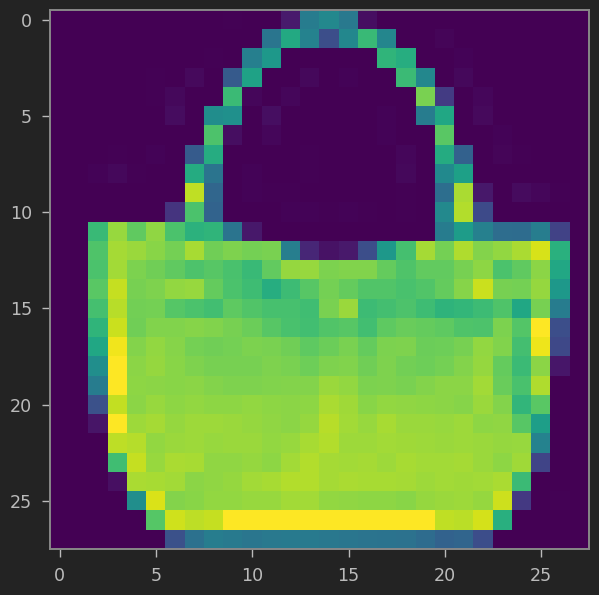

In [57]:
i = 100
plt.imshow(x_train[i])
print(y_train[i])

In [58]:
import numpy as np

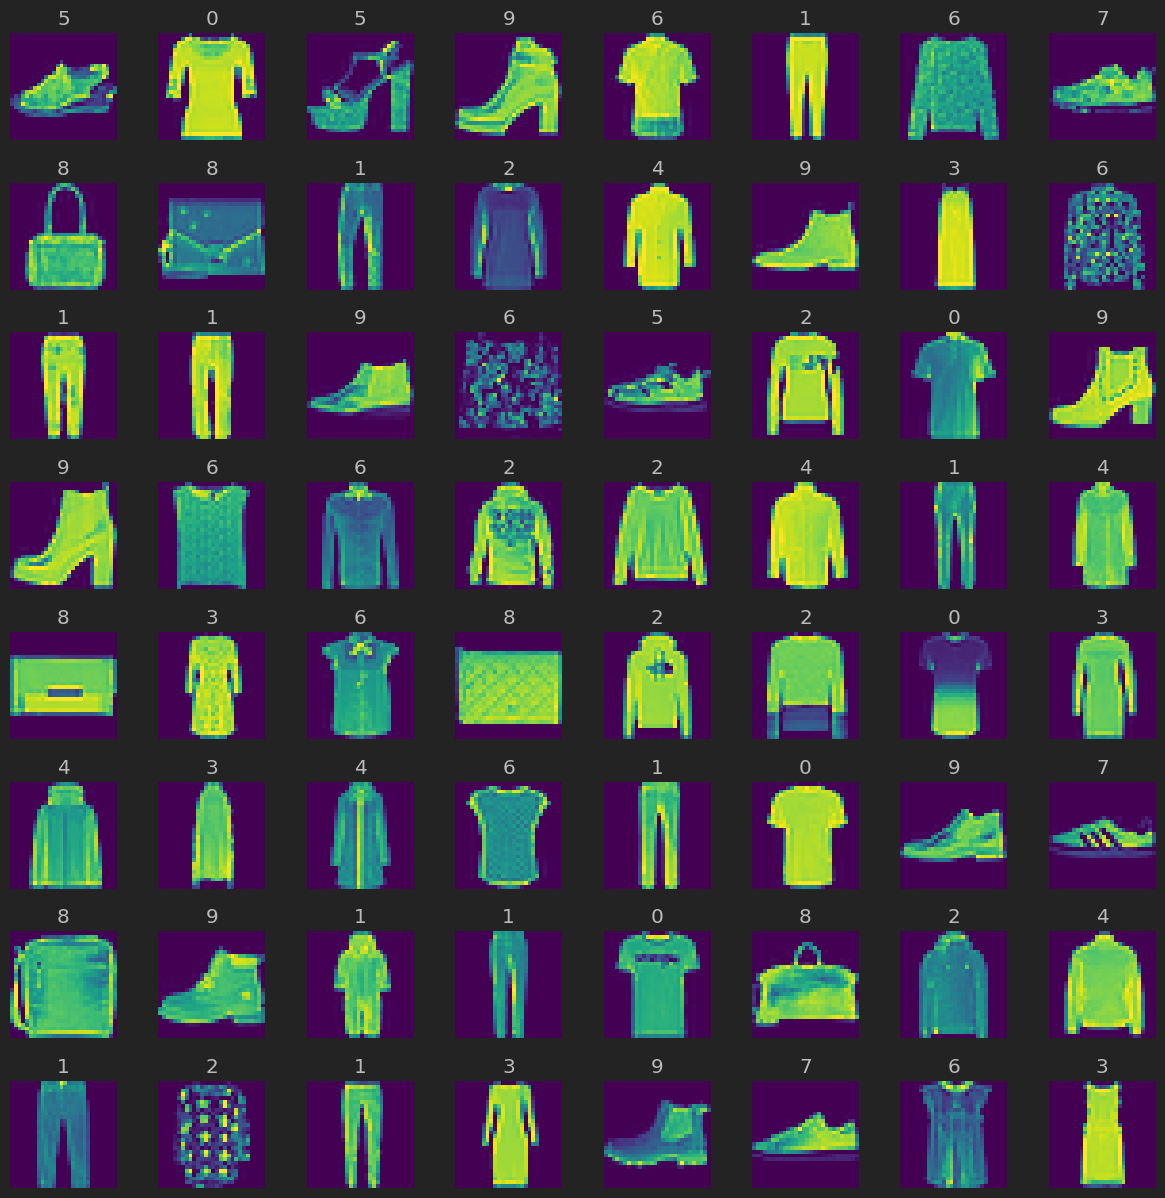

In [59]:
W_grid = 8
L_grid = 8

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()

n_training = len(x_train)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

**훈련 데이터 준비**

In [60]:
num_cate = 10
y_train = tf.keras.utils.to_categorical(y_train, num_cate)

In [61]:
y_train.shape

(60000, 10)

In [62]:
y_test = tf.keras.utils.to_categorical(y_test, num_cate)

In [63]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [64]:
x_train = np.expand_dims(x_train, axis = -1)

In [65]:
x_train.shape

(60000, 28, 28, 1)

In [66]:
y_train.shape

(60000, 10)

**딥러닝 모델 생성**

In [67]:
from tensorflow.keras import datasets, layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation = 'relu'))

cnn.add(layers.Dense(10, activation = 'softmax'))

cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

**딥러닝 모델 컴파일 및 훈련**

In [68]:
cnn.compile(optimizer = tf.keras.optimizers.legacy.RMSprop(0.0001, decay = 1e-6), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [69]:
x_train.shape

(60000, 28, 28, 1)

In [70]:
epochs = 10

history = cnn.fit(x_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/10
118/118 [==============================] - 46s 383ms/step - loss: 2.3617 - accuracy: 0.5789
Epoch 2/10
118/118 [==============================] - 46s 390ms/step - loss: 0.8684 - accuracy: 0.7386
Epoch 3/10
118/118 [==============================] - 46s 389ms/step - loss: 0.6581 - accuracy: 0.7857
Epoch 4/10
118/118 [==============================] - 46s 389ms/step - loss: 0.5575 - accuracy: 0.8113
Epoch 5/10
118/118 [==============================] - 45s 381ms/step - loss: 0.4958 - accuracy: 0.8309
Epoch 6/10
118/118 [==============================] - 46s 390ms/step - loss: 0.4508 - accuracy: 0.8440
Epoch 7/10
118/118 [==============================] - 46s 388ms/step - loss: 0.4180 - accuracy: 0.8539
Epoch 8/10
118/118 [==============================] - 46s 389ms/step - loss: 0.3891 - accuracy: 0.8639
Epoch 9/10
118/118 [==============================] - 45s 382ms/step - loss: 0.3695 - accuracy: 0.8702
Epoch 10/10
118/118 [==============================] - 46s 389ms/step - l

**테스트 샘플로 모델 평가**

In [71]:
x_test.shape

(10000, 28, 28)

In [72]:
x_test = np.expand_dims(x_test, axis = -1)

In [73]:
x_test.shape

(10000, 28, 28, 1)

In [74]:
y_test.shape

(10000, 10)

In [75]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.5234 - accuracy: 0.8305


[0.523445188999176, 0.8305000066757202]

In [76]:
x_test = x_test.astype('float')

In [77]:
predicted_classes = cnn.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [78]:
predicted_classes

array([[4.76278018e-07, 1.27684660e-04, 4.45173682e-05, ...,
        3.02496050e-02, 1.59300340e-04, 9.57718670e-01],
       [1.25869956e-05, 3.36066080e-07, 9.99886572e-01, ...,
        6.39381642e-06, 4.61910440e-06, 6.37980913e-09],
       [1.97302263e-08, 9.99997675e-01, 9.83748727e-09, ...,
        2.98864817e-12, 3.90567223e-08, 4.46802925e-12],
       ...,
       [7.34810528e-05, 7.13364390e-09, 3.67794200e-07, ...,
        3.61739637e-13, 9.99721766e-01, 6.00072032e-12],
       [8.76216436e-05, 9.99253511e-01, 3.99168812e-06, ...,
        6.43500334e-06, 1.11093985e-04, 2.67162868e-05],
       [2.19778067e-05, 8.86152629e-05, 1.41847914e-03, ...,
        8.75909701e-02, 6.68743020e-03, 3.90442787e-03]], dtype=float32)

In [79]:
predicted_classes = np.argmax(predicted_classes, axis = 1)

In [80]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5])

In [81]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [82]:
y_test = y_test.argmax(1)

In [83]:
y_test

array([9, 2, 1, ..., 8, 1, 5])

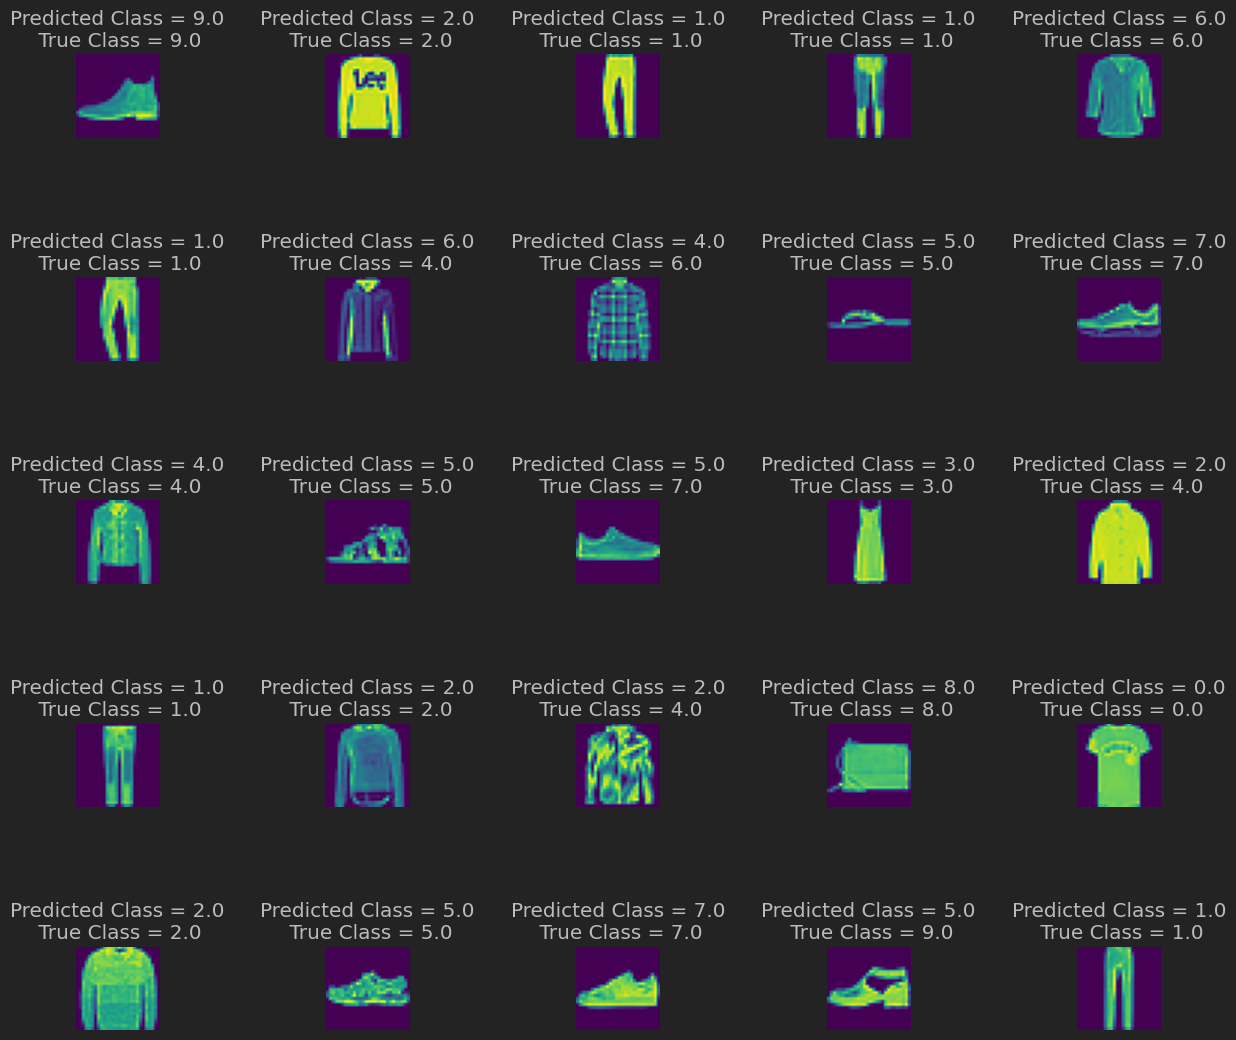

In [84]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(x_test[i].reshape(28,28))
  axes[i].set_title("Predicted Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 2)

In [85]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predicted_classes, y_test)

<Axes: >

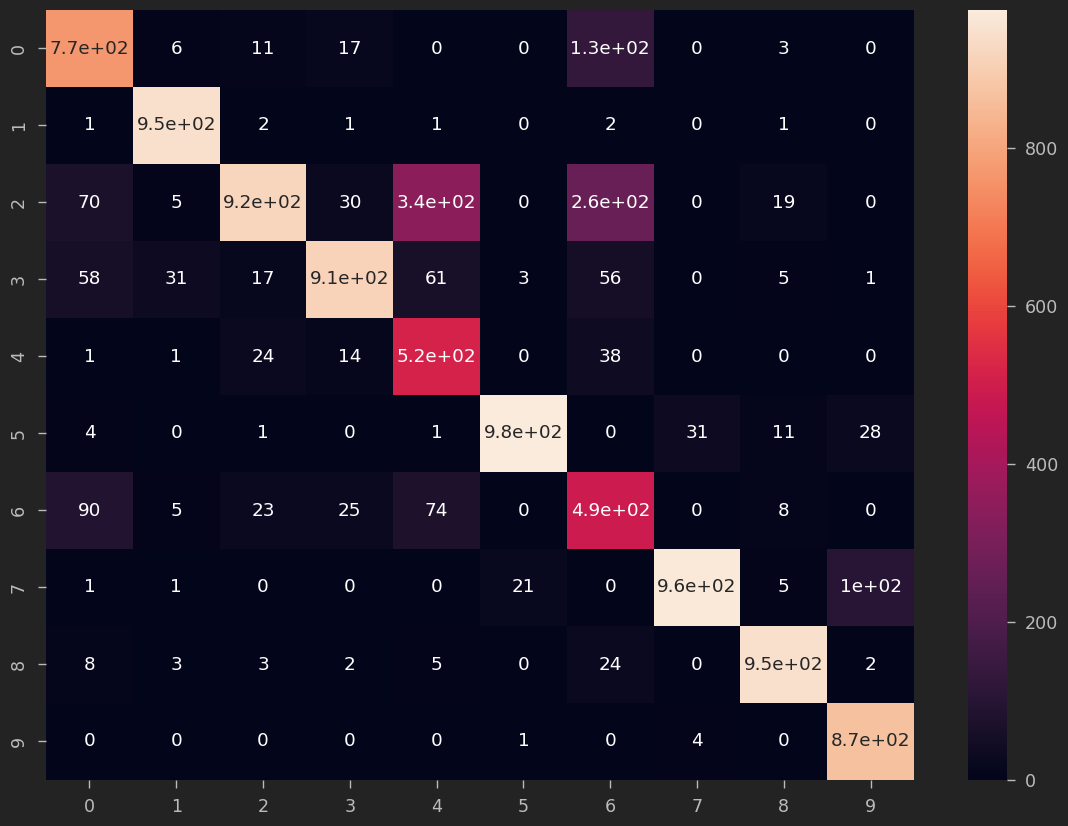

In [86]:
import seaborn as sns
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot = True)

In [87]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ['class {}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1000
           1       0.99      0.95      0.97      1000
           2       0.56      0.92      0.69      1000
           3       0.80      0.91      0.85      1000
           4       0.87      0.52      0.65      1000
           5       0.93      0.97      0.95      1000
           6       0.69      0.49      0.57      1000
           7       0.88      0.96      0.92      1000
           8       0.95      0.95      0.95      1000
           9       0.99      0.87      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.85      0.83      0.83     10000
weighted avg       0.85      0.83      0.83     10000

